In [1]:
import os
import sys

import numpy as np
import pandas as pd
import xarray as xr

# Paths need to be configurated individually, should lead to the aircraft location data.
actual_working_path=os.getcwd()
desired_path_str="\\GIT_Repository\\hamp_processing_py\\hamp_processing_python\\"#\\Flight_Data\\HALO_AC3\\sea_ice\\"
airborne_importer_path=actual_working_path+"/../../"+desired_path_str
hamp_scripts_path=os.getcwd()+"/../../../my_GIT/hamp_processing_python/"
print(hamp_scripts_path)#os.chdir(airborne_importer_path)
sys.path.insert(1, os.path.join(sys.path[0], '..'))
sys.path.insert(2,hamp_scripts_path)
sys.path.insert(3,hamp_scripts_path+"/src/")

import measurement_instruments_ql as Measurement_Instruments_QL
import quicklook_dicts as Quicklook_Dicts

def extract_and_add_date(file):
    date=date=file[-16:-8]
    grid_time = pd.to_datetime(date)
    return ds.assign(time=grid_time)

def add_time_dim(xda):
    from datetime import datetime
    xda = xda.expand_dims(time = [datetime.now()])
    return xda    

C:\Users\u300737\Desktop\Desktop_alter_Rechner\PhD_UHH_WIMI\Work\Synoptic_HALO_AC3_Paper\scripts/../../../my_GIT/hamp_processing_python/


In [2]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatch
import matplotlib.patheffects as PathEffects
import matplotlib.ticker as mticker
from matplotlib.image import imread

import cartopy
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
matplotlib.rcParams.update({"font.size":24})

In [3]:
use_amsr2_sea_ice=True
draw_multibox=True

if use_amsr2_sea_ice:
    amsr2_sea_ice_path=airborne_importer_path+"Flight_Data\\HALO_AC3\\sea_ice\\"
    import glob
    sea_ice_file_list=glob.glob(amsr2_sea_ice_path+"*.nc")
    file_date_str_list=[file[-16:-8] for file in sea_ice_file_list]
    
    sea_ice_ds=xr.open_mfdataset(sea_ice_file_list,combine="nested",
                       concat_dim='time',
                       preprocess=add_time_dim)
    
    sea_ice_ds["lon"]=sea_ice_ds["lon"][0,:,:]
    file_dates=pd.DatetimeIndex(file_date_str_list)
    sea_ice=sea_ice_ds["seaice"].mean(dim="time").compute()
else:
    era5_sea_ice_path="C:\\Users\\u300737\\Desktop\\PhD_UHH_WIMI\\Work\\GIT_Repository\\HALO_AC3\\data\\ERA-5\\"
    march="03"
    april="04"
    sea_ice_base_fname="single_level_daily_average_2022"
    sea_ice_march_fname=sea_ice_base_fname+march+".nc"
    sea_ice_april_fname=sea_ice_base_fname+april+".nc"
    # Sea ice data
    sea_ice_era5_march=xr.open_dataset(era5_sea_ice_path+sea_ice_march_fname)
    sea_ice_era5_april=xr.open_dataset(era5_sea_ice_path+sea_ice_april_fname)
    sea_ice_spring=xr.concat([sea_ice_era5_march,sea_ice_era5_april],dim="time")
    sea_ice=sea_ice_spring["siconc"].mean(dim="time")

C:\Users\u300737\AppData\Local\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [4]:
# Configurate everything and initiate Aircraft classes
campaign="HALO_AC3"
halo_ac3_days={"RF01":"20220311",
               "RF02":"20220312",
               "RF03":"20220313",
               "RF04":"20220314",
               "RF05":"20220315",
               "RF06":"20220316",
               "RF07":"20220320",
               "RF08":"20220321",
               "RF09":"20220328",
               "RF10":"20220329",
               "RF11":"20220330",
               "RF12":"20220401",
               "RF13":"20220404",
               "RF14":"20220407",
               "RF15":"20220408",
               "RF16":"20220410",
               "RF17":"20220411",
               "RF18":"20220412"}

flight="RF01"
date="20220311"
flight_day=None
campaign_path=airborne_importer_path+"/Flight_Data/"+campaign+"/"
prcs_cfg_dict=Quicklook_Dicts.get_prcs_cfg_dict(flight, date, campaign,
                                                    campaign_path,
                                                    additional_entries_dict={})
if flight_day!=None:
    prcs_cfg_dict["FD"]=flight_day
# Data Handling 
datasets_dict, data_reader_dict=Quicklook_Dicts.get_data_handling_attr_dicts(
        entries_to_change={})

# Get Plotting Handling
plot_handler_dict, plot_cls_args_dict,plot_fct_args_dict=\
                                    Quicklook_Dicts.get_plotting_handling_attrs_dict(
                                        entries_to_change={})
                                    
HALO_Devices_cls=Measurement_Instruments_QL.HALO_Devices(prcs_cfg_dict)
POLAR_Devices_cls=Measurement_Instruments_QL.POLAR_Devices(prcs_cfg_dict,major_path=campaign_path)
POLAR_GPS_INS_cls=Measurement_Instruments_QL.GPS_INS(POLAR_Devices_cls)

In [5]:
# Open Polar5,6 positions
POLAR_GPS_INS_cls.open_aircraft_gps_position(used_polar_aircraft="P5")
POLAR_GPS_INS_cls.open_aircraft_gps_position(used_polar_aircraft="P6")

In [6]:
POLAR_GPS_INS_cls.P5_GPS

{'20220320': <xarray.Dataset>
 Dimensions:  (time: 17179)
 Coordinates:
   * time     (time) datetime64[ns] 2022-03-20T10:58:59 ... 2022-03-20T15:47:59
 Data variables:
     alt      (time) float64 ...
     tas      (time) float64 ...
     lat      (time) float64 ...
     lon      (time) float64 ...
     vs       (time) float64 ...
     gs       (time) float64 ...
     pitch    (time) float64 ...
     roll     (time) float64 ...
     heading  (time) float64 ...
 Attributes: (12/14)
     description:    1Hz subset based on GPS1 and INS data processed by AWI en...
     instruments:    GPS1 and INS
     version:        0.1
     contact:        marcus.klingebiel@uni-leipzig.de, martin.gehrmann@awi.de
     institution:    Alfred-Wegener-Institut Helmholtz-Zentrum für Polar- und ...
     author:         Dr. Mario Mech
     ...             ...
     featureType:    trajectory
     mission:        HALO-AC3
     platform:       polar5
     flight_number:  RF01
     title:          polar5 positio

### Call mapping routine

In [7]:
#
import campaign_sea_ice_mapping as si_mapping
#
#si_mapping.plot_campaign_flights_sea_ice_map(HALO_Devices_cls,POLAR_GPS_INS_cls,
#                                        Measurement_Instruments_QL,
#                                        sea_ice,actual_working_path,
#                                        campaign_days=halo_ac3_days,
#                                        with_halo=True,with_polar=True,
#                                        draw_multibox=True,
#                                        use_amsr2_sea_ice=True)

C:\Users\u300737\AppData\Local\Temp\ipykernel_2508\998001927.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  orig_map = plt.cm.get_cmap('Blues')


20220311
20220312
20220313
20220314
20220315
20220316
20220320
20220321
20220328
20220329
20220330
20220401
20220404
20220407
20220408
20220410
20220411
20220412
Figure saved as: C:\Users\u300737\Desktop\Desktop_alter_Rechner\PhD_UHH_WIMI\Work\Synoptic_HALO_AC3_Paper\scripts/../HALO_AC3_campaign_overview.png


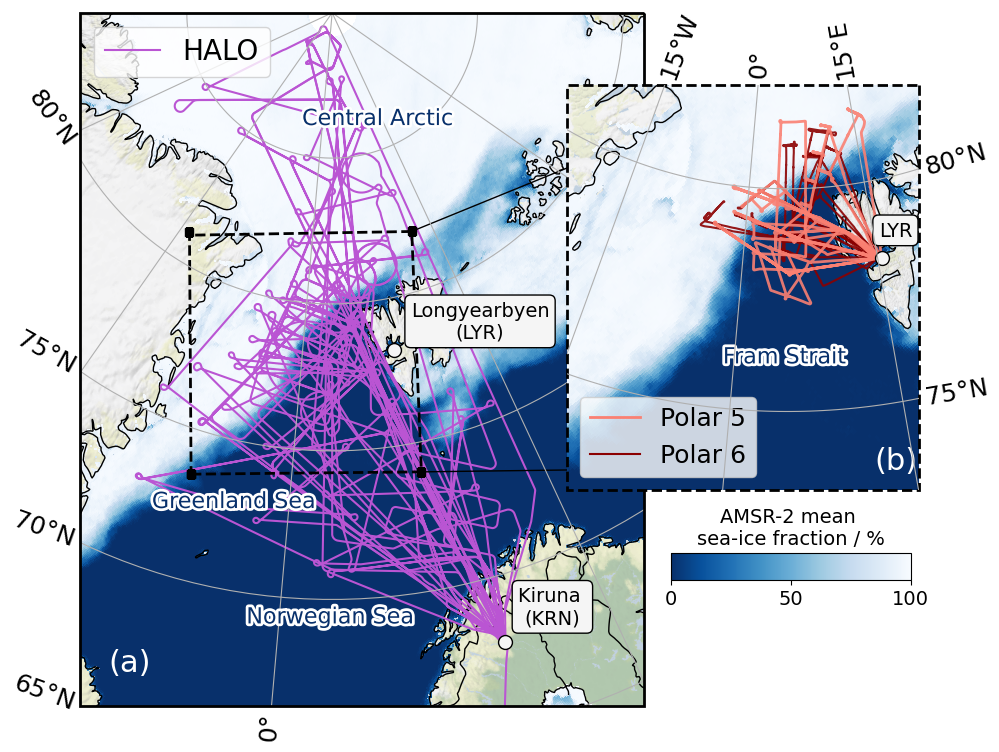

In [9]:
matplotlib.rcParams.update({"font.size":24})
# getting the original colormap using cm.get_cmap() function
orig_map = plt.cm.get_cmap('Blues')
# reversing the original colormap using reversed() function
reversed_map = orig_map.reversed() 
# normally the actual bahamas file is used from HALO-(AC)3. However,
# this is not feasible now for testing
with_halo=True,
halo_in_fig_b=False
with_polar=True,
draw_multibox=False,
use_amsr2_sea_ice=True

y_box=[73.5,74,82,81.,73.5]
x_box=[-12,16,25,-28,-12]

llcrnlat = 76
llcrnlon = -5
urcrnlat = 82
urcrnlon = 15
extent =  [llcrnlon-7.0, urcrnlon, llcrnlat-3, urcrnlat]
big_extent=[llcrnlon-10,urcrnlon+15,llcrnlat-11,90]
coordinates= dict(EDMO=(11.28, 48.08), 
          Kiruna=(20.336, 67.821),
          Longyearbyen=(15.46, 78.25))
coordinates["Ny-Alesund"]=(11.909895,78.923538)
x1, y1 = coordinates["Kiruna"]   
x2, y2 = coordinates["Longyearbyen"]
x3, y3 = coordinates["Ny-Alesund"]
# Create a Stamen terrain background instance.
stamen_terrain = cimgt.Stamen('terrain-background')
#Create a GeoAxes in the tile's projection.
x=np.linspace(-90,90,41)
y=np.linspace(55,90,93)
x_grid,y_grid=np.meshgrid(x,y)
white_overlay= np.zeros((41,93))
plt.rcdefaults()

#
class StadiaStamen(cimgt.Stamen):
    def _image_url(self, tile):
        x,y,z = tile
        url = f"https://tiles.stadiamaps.com/tiles/stamen_terrain_background/{z}/{x}/{y}.jpg?api_key=0963bb5f-6e8c-4978-9af0-4cd3a2627df9"
        return url
stamen_terrain = StadiaStamen('terrain-background')
# Perform real mapping    
fig, ax1 = plt.subplots(1,1, figsize=(12,9),
subplot_kw={"projection": ccrs.NorthPolarStereo(central_longitude=5)})

ax1.set_extent(big_extent, crs=ccrs.Geodetic())
ax1.add_image(stamen_terrain, 5)

ax1.contourf(x_grid,y_grid,white_overlay.T,cmap="Greys",vmin=0,vmax=1,
     transform=ccrs.PlateCarree(),alpha=0.4)

y_box=[73.5,74,82,81.,73.5]
x_box=[-12,16,25,-28,-12]

ax1.coastlines(resolution="50m")
ax1.add_feature(cartopy.feature.BORDERS)
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, 
                      x_inline=False, y_inline=False)
#%% Add locations as text in plots
text_color=(0.031, 0.188, 0.419)


ax1.text(x1 + 4.5, y1 + 0.1, "Kiruna \n(KRN)", fontsize=14,
     transform=ccrs.PlateCarree(),color="k",ha="center",
     bbox=dict(facecolor='whitesmoke',edgecolor="black", boxstyle='round'))

ax1.plot(x1, y1, '.',color="whitesmoke", markersize=20,markeredgecolor="k",
     transform=ccrs.PlateCarree(),zorder=20)

# Sea regions
sea_text_size=16

C1=ax1.pcolormesh(sea_ice.lon,sea_ice.lat,
       np.array(sea_ice[:]), 
       transform=ccrs.PlateCarree(),
           cmap=reversed_map)

BAHAMAS_cls=Measurement_Instruments_QL.BAHAMAS(HALO_Devices_cls)
for day in [*halo_ac3_days.values()]:
    print(day)
    BAHAMAS_cls.cfg_dict["flight_date_used"]=day
    BAHAMAS_cls.open_bahamas_data()
    bahamas=BAHAMAS_cls.bahamas_ds
    # select position and time data
    lon, lat, altitude, times = bahamas["IRS_LON"], \
                                bahamas["IRS_LAT"],\
                                    bahamas["IRS_ALT"],\
                                        bahamas["TIME"]        
    ax1.plot(lon,lat,color="mediumorchid",lw=1.5,
             transform=ccrs.PlateCarree(),alpha=1.0)

ax1.plot(lon,lat,color="mediumorchid",lw=1.5,
         transform=ccrs.PlateCarree(),
         alpha=1.0,label="HALO")

ca_text=ax1.text(-10,86,"Central Arctic",fontsize=sea_text_size,
             transform=ccrs.PlateCarree(),color=text_color)
gs_text=ax1.text(-15,72,"Greenland Sea",fontsize=sea_text_size,
             transform=ccrs.PlateCarree(),color=text_color)
ns_text=ax1.text(-3,69,"Norwegian Sea",fontsize=sea_text_size,
             transform=ccrs.PlateCarree(),color=text_color)

ca_text.set_path_effects([PathEffects.withStroke(
                    linewidth=4, foreground='w')])
gs_text.set_path_effects([PathEffects.withStroke(
                    linewidth=4, foreground='w')])
ns_text.set_path_effects([PathEffects.withStroke(
                    linewidth=4, foreground='w')])

if with_polar:
    ax1.text(x2 + 14, y2-0.5, "Longyearbyen\n(LYR)", fontsize=14,
     transform=ccrs.PlateCarree(),color="k",ha="center",
     bbox=dict(facecolor='whitesmoke',edgecolor="black", boxstyle='round'),zorder=15)
ax1.plot(x2, y2, '.',color="whitesmoke",markersize=20,markeredgecolor="k",
         transform=ccrs.PlateCarree(),zorder=20)
gl.bottom_labels = True
gl.top_labels   = False
gl.right_labels = False
gl.xlabel_style = {'size': 18}
gl.ylabel_style = {'size': 18}
gl.ylocator = mticker.FixedLocator([65,70,75, 80, 85])
gl.xlocator= mticker.FixedLocator([-60,-30,0,30,60])
ax1.legend(loc="upper left",fontsize=20)

ax1.plot([16,40],[74.0,71],lw=1,ls="-",color="k",
         transform=ccrs.PlateCarree())        
ax1.plot([24.5,90],[82,78],lw=1,ls="-",color="k",
    transform=ccrs.PlateCarree())
ax1.plot(x_box,y_box,color="k",ls="--",lw=2,marker="s",
         transform=ccrs.PlateCarree())

#######################################################################
ax2=sub_axes = plt.axes([.635, .35, .39, .45],
                            projection=ccrs.NorthPolarStereo(
                                central_longitude=5)) 
ax2.set_extent(extent, crs=ccrs.Geodetic())
ax2.add_image(stamen_terrain, 8)
ax2.contourf(x_grid,y_grid,white_overlay.T,cmap="Greys",
                 vmin=0,vmax=1,transform=ccrs.PlateCarree(),alpha=0.4)
fs_text=ax2.text(-1,76,"Fram Strait",fontsize=sea_text_size,
         transform=ccrs.PlateCarree(),color=text_color)
fs_text.set_path_effects([PathEffects.withStroke(
                                linewidth=4, foreground='w')])

C2=ax2.pcolormesh(sea_ice.lon, sea_ice.lat,np.array(sea_ice[:]), 
    transform=ccrs.PlateCarree(), cmap=reversed_map)

for date in [*POLAR_GPS_INS_cls.P5_GPS.keys()]:
    ax2.plot(POLAR_GPS_INS_cls.P5_GPS[date]["lon"],
             POLAR_GPS_INS_cls.P5_GPS[date]["lat"],
             color="salmon",transform=ccrs.PlateCarree(),
             lw=2,
             alpha=0.9,zorder=4)
ax2.plot(POLAR_GPS_INS_cls.P5_GPS[date]["lon"],
             POLAR_GPS_INS_cls.P5_GPS[date]["lat"],
             color="salmon",lw=2,label="Polar 5",transform=ccrs.PlateCarree())

for date in [*POLAR_GPS_INS_cls.P6_GPS.keys()]:
    ax2.plot(POLAR_GPS_INS_cls.P6_GPS[date]["lon"],
             POLAR_GPS_INS_cls.P6_GPS[date]["lat"],
             color="darkred",transform=ccrs.PlateCarree(),
             alpha=0.9,zorder=3)
ax2.plot(POLAR_GPS_INS_cls.P6_GPS[date]["lon"],
             POLAR_GPS_INS_cls.P6_GPS[date]["lat"],
             color="darkred",label="Polar 6",transform=ccrs.PlateCarree())
#######################################################################
if halo_in_fig_b:
    for date in halo_ac3_days.values():
        BAHAMAS_cls.cfg_dict["flight_date_used"]=date
        BAHAMAS_cls.open_bahamas_data()
        bahamas=BAHAMAS_cls.bahamas_ds
        # select position and time data
        lon, lat, altitude, times = bahamas["IRS_LON"], \
                                bahamas["IRS_LAT"],\
                                    bahamas["IRS_ALT"],\
                                        bahamas["TIME"]        
        ax2.plot(lon,lat,color="mediumorchid",lw=0.75,
         transform=ccrs.PlateCarree(),alpha=0.6)

gl2 = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, 
                      x_inline=False, y_inline=False,zorder=30)
gl2.bottom_labels = False
gl2.top_labels   = True
gl2.left_labels = False
gl2.xlabel_style = {'size': 18}
gl2.ylabel_style = {'size': 18}
gl2.ylocator = mticker.FixedLocator([75, 80])
gl2.xlocator= mticker.FixedLocator([-15,0,15])

ax2.coastlines(resolution="50m")
ax2.add_feature(cartopy.feature.BORDERS)
#Add your line modifications here
ax1.spines['geo'].set_linewidth(2)

ax2.spines['geo'].set_linewidth(2)
ax2.spines['geo'].set_linestyle('--')

ax2.plot(x2, y2, '.',color="whitesmoke",markersize=20,markeredgecolor="k",
         transform=ccrs.PlateCarree(),zorder=20)
ax2.text(x2 + 0.1, y2 + 0.5, "LYR", fontsize=14,
 transform=ccrs.PlateCarree(),color="k",
 bbox=dict(facecolor='whitesmoke',edgecolor="black", boxstyle='round'),zorder=15)
ax1.text(0.05,0.05,"(a)",color="w",fontsize=22,transform=ax1.transAxes)
ax2.text(0.875,0.05,"(b)",color="w",fontsize=22,transform=ax2.transAxes)

ax2.legend(loc="lower left",fontsize=18,ncol=1)
cbar_ax = fig.add_axes([0.77, 0.25, 0.2, 0.03])
cbar=fig.colorbar(C2, cax=cbar_ax,orientation="horizontal")
cbar.set_ticks([0,50,100])
cbar.ax.set_title("AMSR-2 mean \nsea-ice fraction / %",fontsize=14)
cbar.ax.tick_params(labelsize=14)
plot_path=os.getcwd()+"/../"
fig_name="HALO_AC3_campaign_overview.png"
fig.savefig(plot_path+fig_name,dpi=600,bbox_inches="tight")
print("Figure saved as:", plot_path+fig_name)

In [10]:
#######################################################################
if draw_multibox:
    mini_plot_boxes_lon = {
     'central': [np.linspace(-9.0, 16.0, 1000), np.array([16.0, 16.0]),
                 np.linspace(16.0, -9.0, 1000), np.array([-9.0, -9.0])]}

    mini_plot_boxes_lat = {'central': [np.linspace(75.0, 75.0, 1000), 
                                       np.array([75.0, 81.5]), 
                    np.linspace(81.5, 81.5, 1000),
                    np.array([81.5, 75.0])]}
    for b_key in mini_plot_boxes_lon.keys():
        for edge_lon, edge_lat in zip(mini_plot_boxes_lon[b_key],
                                      mini_plot_boxes_lat[b_key]):
            ax2.plot(edge_lon, edge_lat, 
                     color="darkorange", lw=3,
                     transform=ccrs.PlateCarree(),zorder=3)

#######################################################################
for date in campaign_days.values():
    BAHAMAS_cls.cfg_dict["flight_date_used"]=date
    BAHAMAS_cls.open_bahamas_data()
    bahamas=BAHAMAS_cls.bahamas_ds
# select position and time data
lon, lat, altitude, times = bahamas["IRS_LON"], \
                                bahamas["IRS_LAT"],\
                                    bahamas["IRS_ALT"],\
                                        bahamas["TIME"]        
ax2.plot(lon,lat,color="mediumorchid",lw=0.75,
         transform=ccrs.PlateCarree(),alpha=0.4)
ax2.coastlines(resolution="50m")
ax2.add_feature(cartopy.feature.BORDERS)
#Add your line modifications here
ax2.outline_patch.set_linewidth(2)
ax2.outline_patch.set_linestyle('--')
ax2.plot(x2, y2, '.r', markersize=15,markeredgecolor="k",
         transform=ccrs.PlateCarree(),zorder=20)
ax2.text(x2 + 0.1, y2 + 0.3, "LYR", fontsize=14,
 transform=ccrs.PlateCarree(),color="red",
 bbox=dict(facecolor='lightgrey',edgecolor="black"),zorder=15)
ax2.plot(x3,y3,"salmon",marker="X",markersize=10,markeredgecolor="k",
         transform=ccrs.PlateCarree(),zorder=20)
ax2.text(x3 - 0.05, y3 + 0.5, "NYA", fontsize=14,
 transform=ccrs.PlateCarree(),color="salmon",
 bbox=dict(facecolor='lightgrey',edgecolor="black"),zorder=15)

ax2.legend(loc="lower right",fontsize=18,ncol=2)
if not use_amsr2_sea_ice:
    sea_ice_dataset_name="ERA5"
else:
    sea_ice_dataset_name="AMSR2"
fig_name="/HALO_AC3_Flight_Tracks_Mean_Sea_Ice_Cover_"+\
    sea_ice_dataset_name
if not with_halo:
    fig_name=fig_name+"_no_halo"
if not with_polar:
    fig_name=fig_name+"_no_polar"
if not draw_multibox:
    fig_name=fig_name+"_no_boxes"
file_fmt=".png"
fig_name=fig_name+file_fmt    
fig.savefig(plot_path+fig_name,dpi=300,bbox_inches="tight")
print("Figure saved as:", plot_path+fig_name)


NameError: name 'campaign_days' is not defined